<a href="https://colab.research.google.com/github/sharna33/GlucoGuide/blob/main/GlucoScholar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **📦 Installs**

In [9]:
!pip install pandas scikit-learn datasets

## **⚙️ Random Forest Interface Function**

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

class randomForest:
    """ Columns
      gender (categorical encoded)
      age
      hypertension
      heart_disease
      smoking_history (categorical encoded)
      bmi
      HbA1c_level
      blood_glucose_level
      diabetes
    """
    def __init__(self, test_size=0.2, random_state=42):
        self.csv_link = "https://gist.githubusercontent.com/sharna33/218183b8151378720081809c92b92235/raw/f949bf5752e27a99a44f34b685568801e57dbfe0/diabetes_prediction_dataset.csv"
        self.result_column_name = "diabetes"
        self.random_state = random_state
        self.model = RandomForestClassifier(random_state=self.random_state)
        self.X = None
        self.y = None
        self.test_size = test_size
        self.gender_encoder = LabelEncoder()
        self.smoking_history_encoder = LabelEncoder()

        # Use self.csv_link to access the instance variable
        df = pd.read_csv(self.csv_link)

        df['gender'] = self.gender_encoder.fit_transform(df['gender'])
        df['smoking_history'] = self.smoking_history_encoder.fit_transform(df['smoking_history'])

        self.X = df.drop(self.result_column_name, axis=1)
        self.y = df[self.result_column_name]

        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=self.test_size, random_state=self.random_state)
        self.model.fit(X_train, y_train)

    def predict(self, new_patient):
        prediction = self.model.predict(new_patient)
        return prediction

    def bulkPrediction(self, csv_link, limit=0):
        df = pd.read_csv(csv_link)

        # Apply Label Encoding to 'gender' and 'smoking_history' columns
        df['gender'] = self.gender_encoder.transform(df['gender'])
        df['smoking_history'] = self.smoking_history_encoder.transform(df['smoking_history'])

        if limit != 0:
            df = df.head(limit)

        # Drop the 'diabetes' column before prediction
        df = df.drop(self.result_column_name, axis=1)

        predictions = []
        for index in df.index:
            row_data = df.loc[[index]].values.tolist()
            prediction = self.predict(row_data)
            predictions.extend(prediction)

        return predictions

    def getEncoding(self):
        # Get mappings for gender
        gender_mapping = {index: label for index, label in enumerate(self.gender_encoder.classes_)}
        print("Gender Mapping:", gender_mapping)

        # Get mappings for smoking history
        smoking_history_mapping = {index: label for index, label in enumerate(self.smoking_history_encoder.classes_)}
        print("Smoking History Mapping:", smoking_history_mapping)
        return

## **🛠️ Creating Object**

In [18]:
# creating a object for executing random forest model training
radFor = randomForest()

## **🎯Prediction on Object**

In [23]:
predict = radFor.bulkPrediction("https://gist.githubusercontent.com/sharna33/218183b8151378720081809c92b92235/raw/f949bf5752e27a99a44f34b685568801e57dbfe0/diabetes_prediction_dataset.csv", 10000)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fi

## **🤖Plot Class For Bot**

In [24]:
import matplotlib.pyplot as plt

class ploting_charts:
    def __init__(self):
        return

    def pieChart(self, data, labels, title="Pie Chart"):
        """
        Generates a pie chart with labels and percentages in the legend.

        Args:
            data (list): A list of numerical values representing the data.
            labels (list): A list of labels for the data slices.
            title (str, optional): The title of the chart. Defaults to "Pie Chart".
        """
        plt.figure(figsize=(6, 6))

        # Explode the pie chart slices
        #explode = (0.1, 0)  # Removed to avoid issues with label placement

        # Calculate percentages
        total = sum(data)
        percentages = [(x / total) * 100 for x in data]

        # Create the pie chart with percentage labels and start angle
        wedges, texts, autotexts = plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90,  shadow=True)
        # Create custom legend labels with percentages
        legend_labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, percentages)]

        # Add the legend
        plt.legend(wedges, legend_labels, loc="best", bbox_to_anchor=(1, 0, 0.5, 1))


        plt.title(title)
        plt.axis('equal')
        plt.show()

    def barChart(self, data, labels, title="Bar Chart", xlabel="X-axis", ylabel="Y-axis"):
        """
        Generates a bar chart.

        Args:
            data (list): A list of numerical values representing the data.
            labels (list): A list of labels for the bars.
            title (str, optional): The title of the chart. Defaults to "Bar Chart".
            xlabel (str, optional): The label for the x-axis. Defaults to "X-axis".
            ylabel (str, optional): The label for the y-axis. Defaults to "Y-axis".
        """
        plt.figure(figsize=(8, 6))  # Adjust figure size as needed
        plt.bar(labels, data)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

## **🔍Test**

dict_items([('Yes', 813), ('No', 9187)])


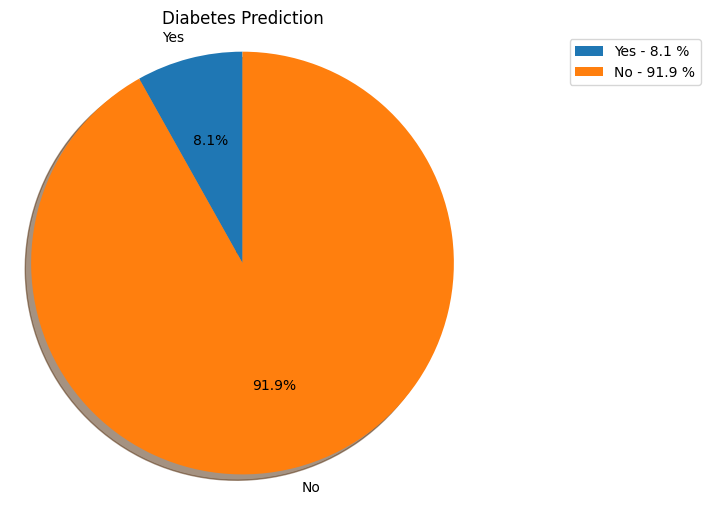

In [25]:
plotObj = ploting_charts()

diabetics= {
    "Yes": 0,
    "No": 0,
}

for _ in predict:
    if _ == 1:
        diabetics["Yes"] += 1
    else:
        diabetics["No"] += 1

print(diabetics.items())

plotObj.pieChart(diabetics.values(), diabetics.keys(), "Diabetes Prediction")